# Logistic Regression From Scratch

## Table of Contents
1. Logistic Regression Hypothesis 
2. Loss Function & Intro to Negative Log-Likelihood (NLL)
3. Gradient Descent for NLL
4. Implimentation
5. Comparison with sklearn

<br />

---

## Hypothesis

Logistic Regression, though given the name, is a form of classification. Given the hypothesis $ w^{\top}x+b $ logistic regression makes use of a non-linear activation function. Namely, it using the sigmoid function to make a hypothesis in the range $ (0, 1)$. This sigmoid function is often denoted $\sigma(z)$ where $z = w^{\top}x+b $. Specifically, this sigmoid function is:

<br />

$$ \sigma(z) = \frac{1}{1 + e^{-(w^{\top}x+b)}} $$

<br />


For added intuition, plotting the sigmoid function gives: 

<img src="img/sigmoid_function.png" width="400" height="200">

Now the Logistic Regression would make the hypothesis:


<br />

$$
h(x ; w, b)=\left\{\begin{array}{ll}
1 & \text { if } \sigma(w^{\top}x+b)>=0.5 \\
0 & \text { if } \sigma(w^{\top}x+b) < 0.5 \\
\end{array}\right.
$$

<br />

---

## Loss Function - Negative Log-Likelihood (NLL)

Because the values are between 0 and 1 then we can think of a result given for some $x_i$ is the probability that the classifier believes it's either positive or negative. That is a guess on $x_i$ is $g_i = \sigma(w^{\top}x_i+b)$ where the probability $P(x)$ that a point is either negative or positive is $g_i$ if $y_i = 1$ and is $ 1 - g_i $ if $y_i = 0$. Using the laws of probability we can summarize this as:

$$ \prod_{i=1}^{n}\left\{\begin{array}{ll}
g_i & \text { if } y_i = 1 \\
1 - g_i & \text { if } y_i = 0 \\
\end{array}\right. $$

Using a very beautiful trick we can rewrite this entire thing as:

$$ \prod_{i=1}^{n} \; g_i^{y_i} \; (1-g_i)^{1-y_i} $$

But, in math we like summations and not big products like this. So to convert this to a sum we just use the log trick. Giving:

$$ \sum_{i=1}^{n} \; [y_i\log(g_i) \;+\; (1-y_i)\log(1-g_i)] $$

And this is out loss function. It is commonly known as the negative log-likelihood or log loss or cross entropy. The notation I will use for this loss funtion will be $\mathbb{L}_{NLL}(g_i, y_i) $.

Now that we have defined the loss, we can write our normalized objective function $J(w, b)$ for logistic regression as:

$$ J(w, b) = \frac{1}{n} \sum_{i=1}^{n} [\mathbb{L}_{NLL}(\sigma(w^{\top}x_i+b), y_i)] + \frac{\lambda}{2} \|w\|^{2} $$

<br />




---

## Gradient Descent

Using gradient descent to optimize our objective function we can simply take the partial derivative w.r.t $w$ and $b$ then make the update on w and b as follows:

w: $w_{t+1} = w_{t} - \mu \nabla_{w}J(w, b)$

b: $w_{t+1} = b_{t} - \mu \nabla_{b}J(w, b)$


For our objective function this leads to the updates:

w: $w_{t+1} = w_{t} - \mu (\frac{1}{n} \sum_{i=1}^{n} [(\sigma(w^{\top}x_i+b) - y_i)x_i] + \lambda \|w\|)$

b: $w_{t+1} = b_{t} - \mu (\frac{1}{n} \sum_{i=1}^{n} [(\sigma(w^{\top}x_i+b) - y_i)] + \lambda \|w\|)$

<br />


[//]: # (Now though I have clarified the casses given both a $w$ and a $b$ I am going to combine my bias and my weights letting the weights of size $(d, 1)$ be of size $(d + 1, 1)$ my points $X$ that were of size $(d, n) $ be of size $(d + 1, n) $ where the $d + 1$ dimension of length $n$ is all $1$'s. This might sound a little confusing so heres a small example:)


---

## My Implimentation









In [17]:
# IMPORTS
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [23]:
# DATA 
n = 200
X, Y = make_blobs(n_samples = n, centers = 2, n_features = 2, cluster_std = 5, random_state = 9) # 11 random normal

dim_add = np.array([1]*n)[np.newaxis]
X = np.append(X.T, dim_add, axis=0)
X = X.T

In [24]:
# MY FROM SCRATCH IMPLIMENTATION

def sigmoid(z): #Non-Linear Hypothesis Function
    return 1.0 / (1.0 + np.exp(-z))


def gradient_descent(w,  X, Y, eta, d, t, lamb):
    for i in range(t):
        hypothesis = sigmoid(np.dot(w.T, X))
        hypothesis[hypothesis > 0.5] = 1
        hypothesis[hypothesis <= 0.5] = 0

        gradient_weight = np.array(np.dot(hypothesis - Y, X.T)) / len(X[0])
        regularization = lamb * np.linalg.norm(w) 

        w = (w.T - eta * (gradient_weight + regularization)).T

    return w

In [25]:
# SKLEARN Implimentation for Reference

logisticReg = LogisticRegression()
logisticReg.fit(X, Y)
test = logisticReg.predict(X)
coef = logisticReg.coef_[0]

In [26]:
init_weights = np.array([[0], [0], [0]])
eta = 0.01
dimension = len(init_weights)
t = 10000
lamb = 0.0001

weights = gradient_descent(init_weights, X.T, Y, eta, dimension, t, lamb)

print("Scratch Implimentation Weights: {}".format(weights.T))


# ------ #

print("SKLearn Implimentation Weights: {}".format(coef))

weight_0 = coef[0]
weight_1 = coef[1]
weight_2 = coef[2]

Scratch Implimentation Weights: [[ 0.01019322 -0.00877474  0.01281389]]
SKLearn Implimentation Weights: [ 5.74787157e-01 -4.64166553e-01 -1.95321050e-04]


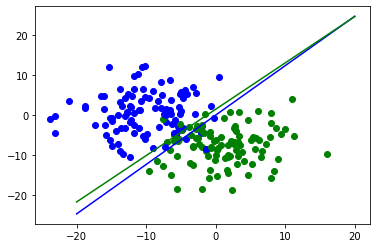

In [27]:
# PLOTTING

X = X.T
for i in range(n):
    if (Y[i] == 1):
        plt.scatter(X[:, i][0], X[:, i][1], color="green") 
    else:
        plt.scatter(X[:, i][0], X[:, i][1], color="blue")

        
x = np.linspace(-20, 20, 20)
hyperplane_1 = (((-1)*(weights[0] / weights[1]) * x) - (weights[2]/weights[1]))
hyperplane = (((-1)*(weight_0 / weight_1) * x) - (weight_2/weight_1))

plt.plot(x, hyperplane, '-', color="blue")
plt.plot(x, hyperplane_1, '-', color="green")

plt.show()